In [1]:
pwd

'C:\\Users\\still\\OneDrive\\Diverse\\RUC\\MSc Thesis\\Jupyter'

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

In [3]:
################ SERVER ################

In [4]:
dataDir = '/Users/still/Downloads/Exported'

# Areas
fastifyServerEmployeesAreas = pd.read_csv(dataDir + '/fastifyServerEmployeesAreas.csv', sep=',', decimal= ',')
fastifyServerDepartmentsAreas = pd.read_csv(dataDir + '/fastifyServerDepartmentsAreas.csv', sep=',', decimal= ',')

my_pal = {"Express":"#03a341"}#, "Nest":"#ff9f0f", "Fastify":"#03a341", "Koa":"#fa344f"}
my_pal2 = ["#03a341"]#, "#ff9f0f", "#03a341", "#fa344f"]

fastifyServerEmployeesAreas

,area,run
0,69.74999999999999,1
1,68.89999999999999,2
2,72.89999999999999,3
3,70.89999999999998,4
4,66.49999999999999,5
5,74.75,6
6,68.24999999999999,7
7,65.74999999999999,8
8,66.74999999999999,9
9,66.14999999999999,10


In [5]:
for i in range (0, 31):
    fastifyServerEmployeesAreas['area'][i] = round(float(fastifyServerEmployeesAreas['area'][i]),1)
    fastifyServerDepartmentsAreas['area'][i] = round(float(fastifyServerDepartmentsAreas['area'][i]),1)
    
fastifyServerDepartmentsAreas

C:\Users\still\AppData\Local\Temp\ipykernel_19028\1557855341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastifyServerEmployeesAreas['area'][i] = round(float(fastifyServerEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_19028\1557855341.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastifyServerDepartmentsAreas['area'][i] = round(float(fastifyServerDepartmentsAreas['area'][i]),1)


,area,run
0,148.8,1
1,150.0,2
2,146.6,3
3,146.3,4
4,145.0,5
5,145.4,6
6,147.0,7
7,148.4,8
8,141.2,9
9,140.7,10


In [6]:
m1c = fastifyServerEmployeesAreas['area'].mean()
m1s = fastifyServerDepartmentsAreas['area'].mean()

d = {'experiment': ["Fastify"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [7]:
df2 = df
df2 = pd.melt(df2, id_vars="experiment", var_name="means", value_name="Mean area")
df2

,experiment,means,Mean area
0,Fastify,meanAreaEmp,68.061290
1,Fastify,meanAreaDept,138.487097


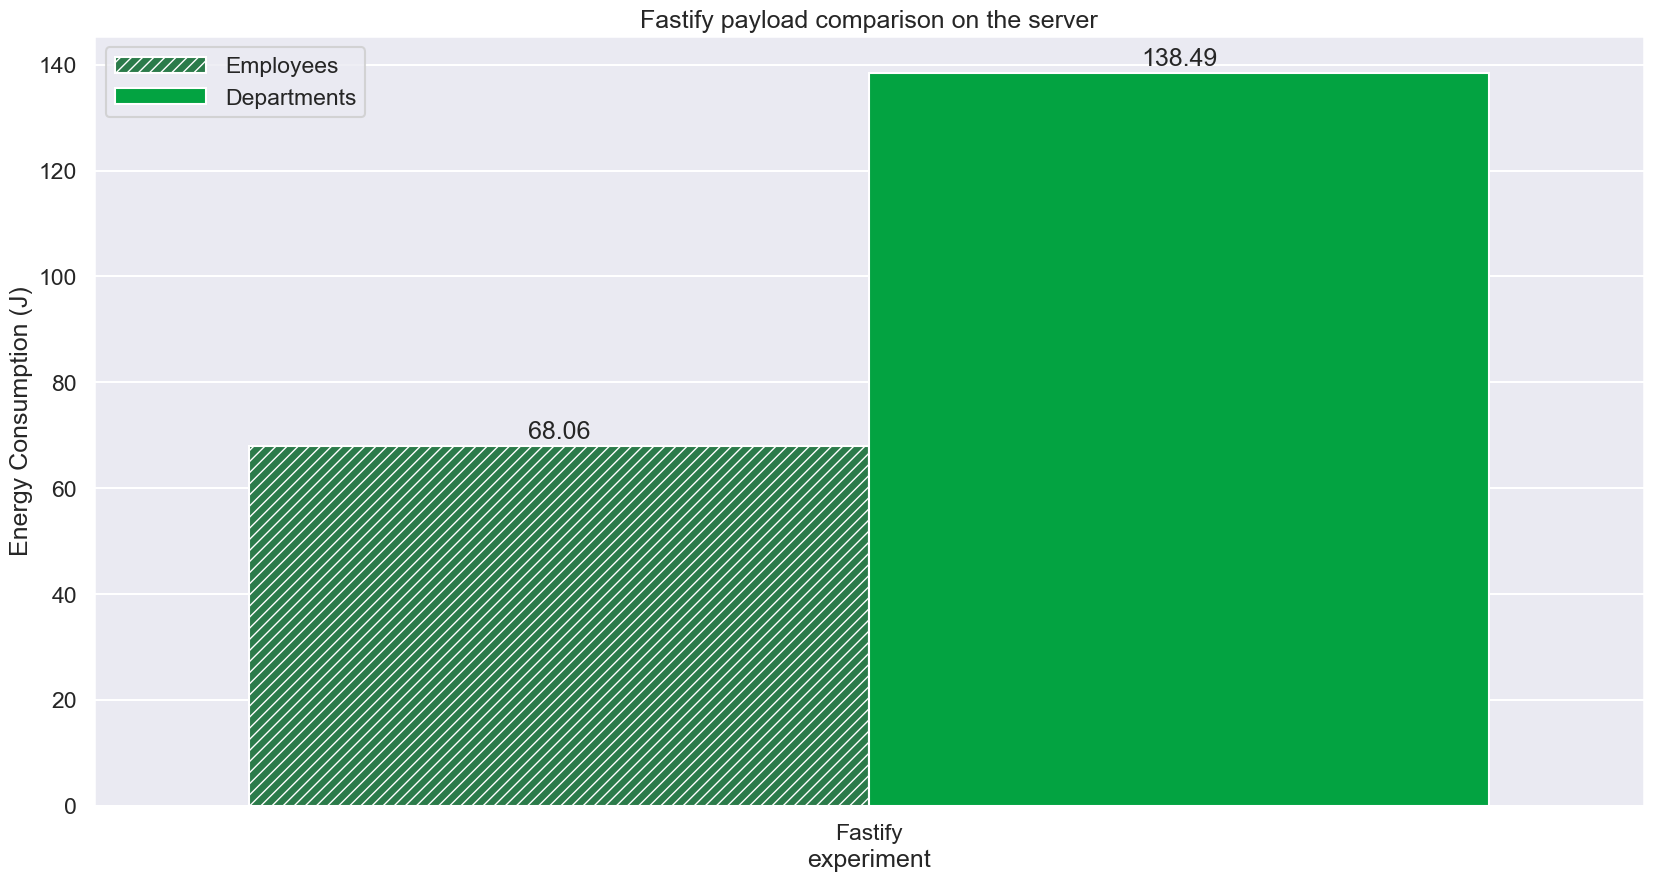

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df2)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Fastify payload comparison on the server")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
          handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

In [9]:
################ CLIENT ################

In [10]:
# Areas
fastifyClientEmployeesAreas = pd.read_csv(dataDir + '/fastifyClientEmployeesAreas.csv', sep=',', decimal= ',')
fastifyClientDepartmentsAreas = pd.read_csv(dataDir + '/fastifyClientDepartmentsAreas.csv', sep=',', decimal= ',')

fastifyClientEmployeesAreas

,area,run
0,67.60000000000001,1
1,68.0,2
2,71.75,3
3,69.2,4
4,65.55000000000001,5
5,75.45000000000002,6
6,68.1,7
7,65.95,8
8,67.35000000000001,9
9,65.15,10


In [11]:
for i in range (0, 31):
    fastifyClientEmployeesAreas['area'][i] = round(float(fastifyClientEmployeesAreas['area'][i]),1)
    fastifyClientDepartmentsAreas['area'][i] = round(float(fastifyClientDepartmentsAreas['area'][i]),1)
    
fastifyClientDepartmentsAreas

C:\Users\still\AppData\Local\Temp\ipykernel_19028\202035211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastifyClientEmployeesAreas['area'][i] = round(float(fastifyClientEmployeesAreas['area'][i]),1)
C:\Users\still\AppData\Local\Temp\ipykernel_19028\202035211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastifyClientDepartmentsAreas['area'][i] = round(float(fastifyClientDepartmentsAreas['area'][i]),1)


,area,run
0,138.3,1
1,140.5,2
2,138.0,3
3,137.1,4
4,139.2,5
5,143.8,6
6,145.2,7
7,140.5,8
8,146.4,9
9,141.4,10


In [12]:
m1c = fastifyClientEmployeesAreas['area'].mean()
m1s = fastifyClientDepartmentsAreas['area'].mean()

d = {'experiment': ["Fastify"],
     'meanAreaEmp': [m1c],
     'meanAreaDept': [m1s]}
df = pd.DataFrame(data=d)

In [13]:
df3 = df
df3 = pd.melt(df3, id_vars="experiment", var_name="means", value_name="Mean area")
df3

,experiment,means,Mean area
0,Fastify,meanAreaEmp,68.167742
1,Fastify,meanAreaDept,136.232258


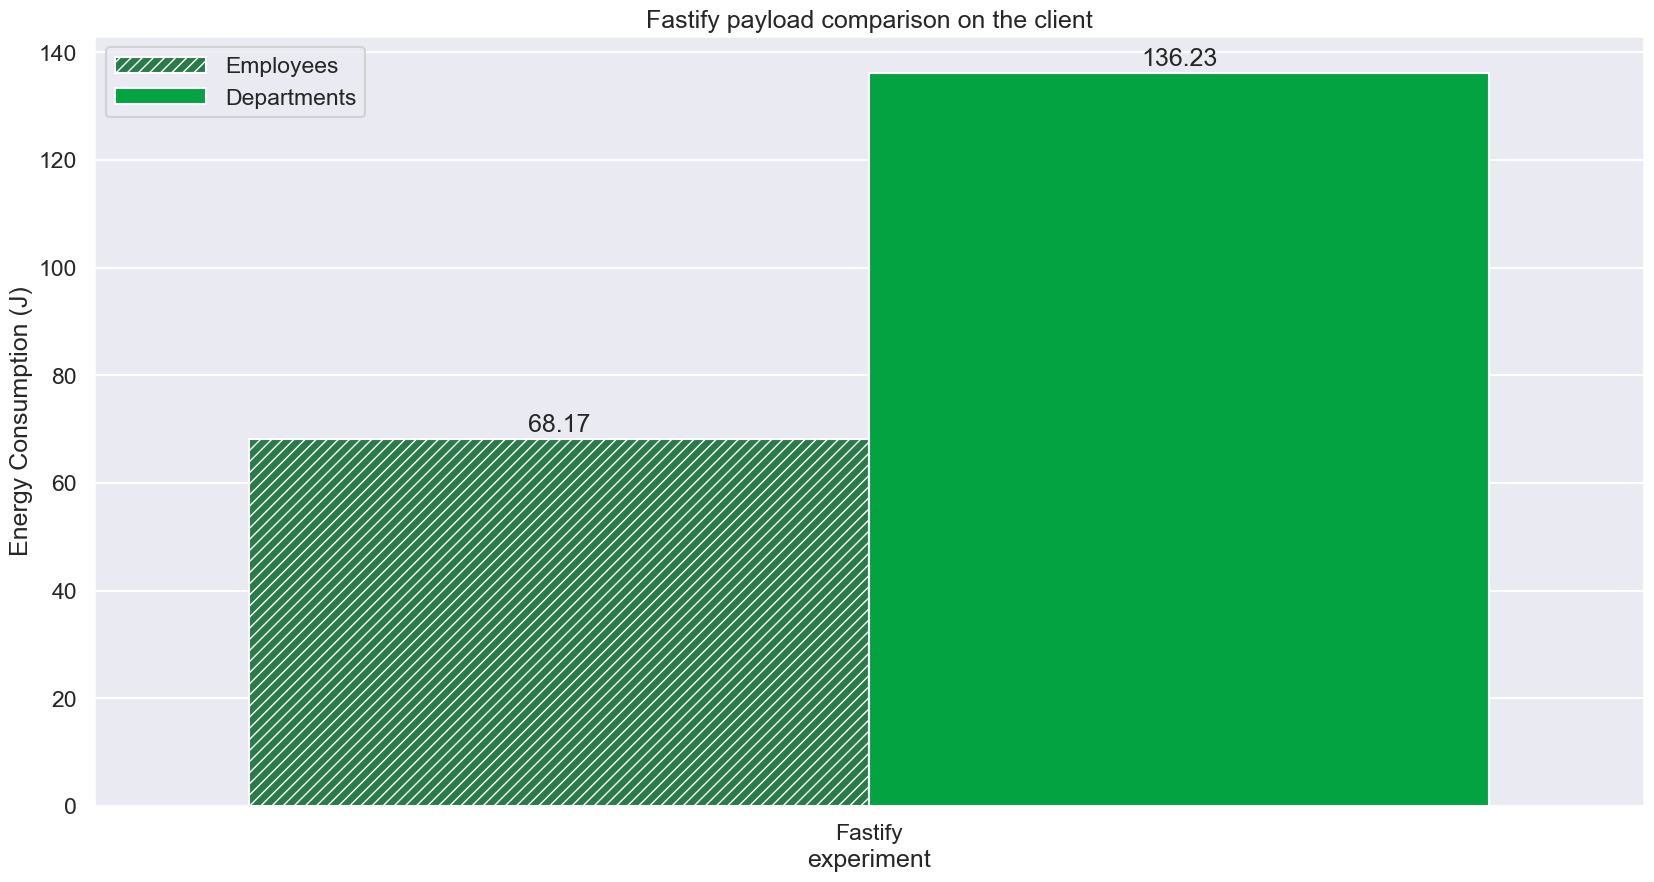

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context("talk")
ax = sns.barplot(x="experiment", y="Mean area", hue="means",
            palette={'meanAreaEmp': 'white', 'meanAreaDept': 'black'}, data=df3)
for bar_group, desaturate_value in zip(ax.containers, [0.5, 1]):
    for bar, color in zip(bar_group, my_pal2):
        bar.set_facecolor(sns.desaturate(color, desaturate_value))

hatches = ["///", ""]
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
        
plt.title("Fastify payload comparison on the client")
#plt.xlabel("Experiment Type")
plt.ylabel("Energy Consumption (J)")

handles, labels = ax.get_legend_handles_labels()

from matplotlib.legend_handler import HandlerTuple
ax.legend(handles=[tuple(bar_group) for bar_group in ax.containers],
          labels=['Employees', 'Departments'],
            handlelength=4, handler_map={tuple: HandlerTuple(ndivide=None, pad=0.1)})

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()